In [1]:
import sys
import os
import time
from matplotlib import pyplot as plt
import numpy as np
from decimal import *

plt.rcParams['figure.dpi']=300

getcontext().prec = 18
getcontext().rounding = ROUND_FLOOR

print('Done !')

Done !


In [2]:
# ----------- Constants -------------

base_multiplier = Decimal(1)
threshold = Decimal(0.75)

year = Decimal(31536000)

fee = Decimal(0.05) # 5% fee

print('Done !')

Done !


In [3]:
# ------------------------------------
# ------------------------------------
# ------------- Inputs ---------------

# from Aave
GHO_per_stkAAVE = Decimal(100) # to update
GHO_yearly_APY = Decimal(0.025) # to update => current eqv to 2.5% APY
max_interest_rate_discount_list = [Decimal(0.25),Decimal(0.5),Decimal(0.75)]

# from Dullahan
vault_TVL = Decimal(80_000)
renting_fee_per_sec = Decimal(0.0000000315) #in GHO per stkAAVE

extra_multiplier_per_bps = Decimal(4) # => so 100% => multiplier is x2

# prices
stkAave_price = Decimal(56.44)
GHO_price = Decimal(1)

print('Done !')

Done !


In [4]:
# ------------------------------------
# ------------------------------------
# ------------ Outputs ---------------

rented_amounts = [[],[],[]]
utilization_rates = [[],[],[]]
vanilla_rates = [[],[],[]]
discounted_rates = [[],[],[]]
yearly_renting_rates = [[],[],[]]
total_rates = [[],[],[]]
dstkAave_APRs = [[],[],[]]

print('Done !')

Done !


In [5]:
# ------------------------------------
# ------------------------------------
# ---------- Calculations ------------

print("Calculating ...")
print()
print()
print("! Attention !")
print("Calculations where made based on arbitrary values")
print("and renting yearly rate is based on an estimation of the total borrowed GHO")
print()
print()

for i in range(3):
    max_interest_rate_discount = max_interest_rate_discount_list[i]

    max_discount_GHO_borrow_APY = GHO_yearly_APY * (Decimal(1) - max_interest_rate_discount)

    utilization_steps = Decimal(1_000)
    current_utilization = Decimal(0)

    while(current_utilization <= vault_TVL):
        utilization_rate = current_utilization / vault_TVL
        current_rate = renting_fee_per_sec

        if(utilization_rate >= threshold):
            multiplier = base_multiplier + (extra_multiplier_per_bps * (utilization_rate - threshold))
            current_rate = current_rate * multiplier

        yearly_rate = current_rate * year
        yearly_renting_rate = yearly_rate / GHO_per_stkAAVE # double check that one

        # get total year reward based on rented stkAave amount
        total_GHO_earned = yearly_rate * utilization_steps
        total_GHO_earned_without_fees = total_GHO_earned - (total_GHO_earned * fee)
        GHO_earned_per_deposited_stkAave = total_GHO_earned_without_fees / vault_TVL
        dstkAave_APR = (GHO_earned_per_deposited_stkAave * GHO_price) / stkAave_price

        #write data in outputs
        rented_amounts[i].append(current_utilization)
        utilization_rates[i].append(utilization_rate * Decimal(100))
        yearly_renting_rates[i].append(yearly_renting_rate * Decimal(100))
        vanilla_rates[i].append(GHO_yearly_APY * Decimal(100))
        discounted_rates[i].append(max_discount_GHO_borrow_APY * Decimal(100))
        total_rates[i].append((yearly_renting_rate + max_discount_GHO_borrow_APY)  * Decimal(100))
        dstkAave_APRs[i].append(dstkAave_APR * Decimal(100))

        print(f'Rented Amount: {current_utilization}')
        print(f'Utilization: {utilization_rate * Decimal(100)}%')
        print(f'Yearly Renting Rate: {yearly_renting_rate * Decimal(100)}%')
        print(f'Vanilla Borrow Rate: {GHO_yearly_APY * Decimal(100)}%')
        print(f'Discounted Borrow Rate: {max_discount_GHO_borrow_APY * Decimal(100)}%')
        print(f'Adjusted Renting Rate: {(yearly_renting_rate + max_discount_GHO_borrow_APY)  * Decimal(100)}%')
        print(f'Estimated dstkAave APR: {dstkAave_APR * Decimal(100)}%')
        print()
        print('----------')
        print()

        current_utilization = current_utilization + utilization_steps



Calculating ...


! Attention !
Calculations where made based on arbitrary values
and renting yearly rate is based on an estimation of the total borrowed GHO


Rented Amount: 0
Utilization: 0%
Yearly Renting Rate: 0.9933839999999999216574595373%
Vanilla Borrow Rate: 2.500000000000000138777878078%
Discounted Borrow Rate: 1.875000000000000104083408559%
Adjusted Renting Rate: 2.868384000000000025740868096%
Estimated dstkAave APR: 0.02090084160170092046500269062%

----------

Rented Amount: 1000
Utilization: 1.2500%
Yearly Renting Rate: 0.9933839999999999216574595373%
Vanilla Borrow Rate: 2.500000000000000138777878078%
Discounted Borrow Rate: 1.875000000000000104083408559%
Adjusted Renting Rate: 2.868384000000000025740868096%
Estimated dstkAave APR: 0.02090084160170092046500269062%

----------

Rented Amount: 2000
Utilization: 2.500%
Yearly Renting Rate: 0.9933839999999999216574595373%
Vanilla Borrow Rate: 2.500000000000000138777878078%
Discounted Borrow Rate: 1.875000000000000104083408559

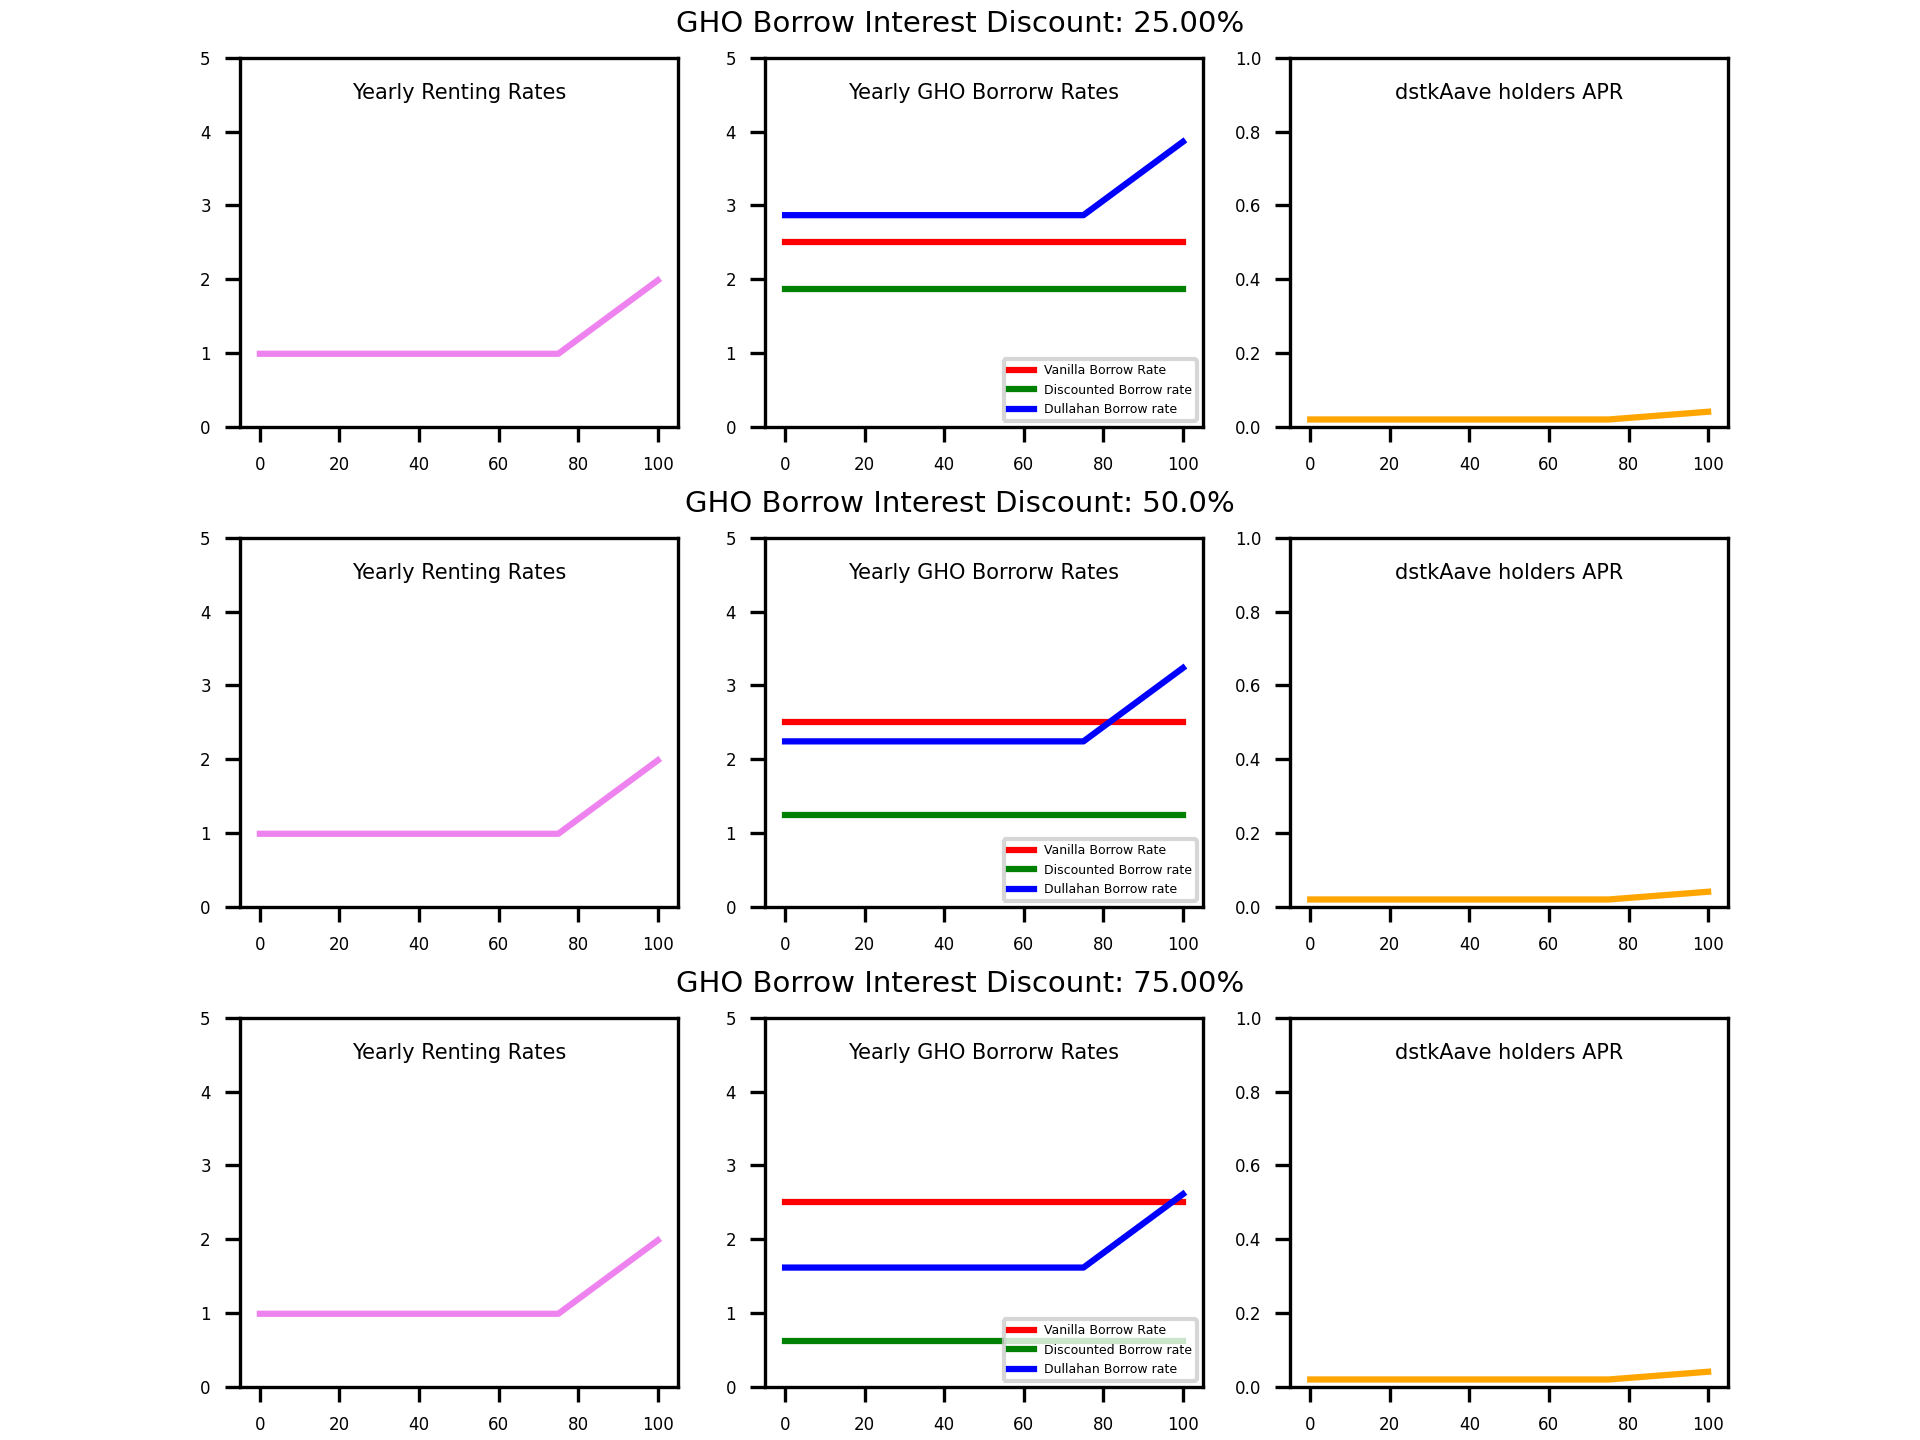

In [10]:
# ------------------------------------
# ------------------------------------
# ------------- Display --------------

plt.rc('axes', titlesize=4)     # fontsize of the axes title
plt.rc('axes', labelsize=4)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=4)    # fontsize of the tick labels
plt.rc('ytick', labelsize=4)

# print the data here
fig, axs = plt.subplots(3, 1, sharex=False, sharey=False)
fig.suptitle('Dullahan Yearly rates Simulation', fontsize=10)

# clear subplots
for ax in axs:
    ax.remove()

gridspec = axs[0].get_subplotspec().get_gridspec()
subfigs = [fig.add_subfigure(gs) for gs in gridspec]

i = 0

for row, subfig in enumerate(subfigs):
    subfig.suptitle(f'GHO Borrow Interest Discount: {max_interest_rate_discount_list[i] * 100}%', fontsize=7)

    axs = subfig.subplots(nrows=1, ncols=3)
    
    axs[0].plot(utilization_rates[i], yearly_renting_rates[i], color='violet')
    axs[0].set_title('Yearly Renting Rates', y=1.0, pad=-10, fontsize=5)
    axs[0].set_ylim(0, 5)
    
    axs[1].plot(utilization_rates[i], vanilla_rates[i], color='red', label="Vanilla Borrow Rate")
    axs[1].plot(utilization_rates[i], discounted_rates[i], color='green', label="Discounted Borrow rate")
    axs[1].plot(utilization_rates[i], total_rates[i], color='blue', label="Dullahan Borrow rate")
    axs[1].legend(loc=4, prop={'size': 3})
    axs[1].set_title('Yearly GHO Borrorw Rates', y=1.0, pad=-10, fontsize=5)
    axs[1].set_ylim(0, 5)
    
    axs[2].plot(utilization_rates[i], dstkAave_APRs[i], color='orange')
    axs[2].set_title('dstkAave holders APR', y=1.0, pad=-10, fontsize=5)
    axs[2].set_ylim(0, 1)

    i += 1

# set the spacing between subplots
"""plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)"""
plt.show()

# ------------------------------------